# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [1]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("asset-v1_HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [2]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby('bird_name')
print(grouped_birds.head())

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = birddata.speed_2d.mean()
print(mean_speeds)

       altitude               date_time  device_info_serial   direction  \
0            71  2013-08-15 00:18:08+00                 851 -150.469753   
1            68  2013-08-15 00:48:07+00                 851 -136.151141   
2            68  2013-08-15 01:17:58+00                 851  160.797477   
3            73  2013-08-15 01:47:51+00                 851   32.769360   
4            69  2013-08-15 02:17:42+00                 851   45.191230   
19795       382  2013-08-15 00:20:45+00                 864  145.179141   
19796       197  2013-08-15 00:51:00+00                 864  -25.393443   
19797       206  2013-08-15 01:21:08+00                 864  158.480445   
19798       200  2013-08-15 01:50:57+00                 864  139.613245   
19799       199  2013-08-15 02:20:48+00                 864 -134.485593   
40916        55  2013-08-15 00:01:08+00                 833  -91.499509   
40917        54  2013-08-15 00:31:00+00                 833 -141.804053   
40918        55  2013-08-

In [3]:
# Find the mean `altitude` for each bird.
mean_altitudes = birddata.groupby(['bird_name'])['altitude'].mean()
print(mean_altitudes.head())

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64


In [4]:
# Find the mean `speed_2d` for each bird.
print(birddata.groupby(['bird_name'])['speed_2d'].mean())

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64


### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, extract the date, and store it as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

What is the mean altitude of the birds on 2013-09-12? (Hint: You will need to convert this to a datetime object as well, extract the date, and then use this to index into the dataframe.)

In [5]:
# Convert birddata.date_time to the `pd.datetime` format.
#birddata.date_time = pd.datetime
import datetime

timestamps = []
for k in range(len(birddata)):
    datestring = birddata.date_time.iloc[k][:-12]
    timestamps.append(datetime.datetime.strptime(datestring,'%Y-%m-%d'))
    
# Create a new column of day of observation
birddata["date"] =  pd.Series(timestamps,index=birddata.index)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15


In [6]:
# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby(['date'])

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates['altitude'].mean()
mean_altitudes_perday.head()

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
Name: altitude, dtype: float64

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [9]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(['bird_name','date'])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = birddata.groupby(['bird_name','date'])['altitude'].mean()
mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

In [42]:
import matplotlib.pyplot as plt

eric_daily_speed  =  birddata[['date','speed_2d']].where(birddata.bird_name=="Eric").groupby('date')['speed_2d'].mean()
sanne_daily_speed = birddata[['date','speed_2d']].where(birddata.bird_name=="Sanne").groupby('date')['speed_2d'].mean()
nico_daily_speed  = birddata[['date','speed_2d']].where(birddata.bird_name=="Nico").groupby('date')['speed_2d'].mean() 

print(eric_daily_speed)
#[birddata.bird_name=="Sanne"]['speed_2d'].mean()

date
2013-08-15    2.121517
2013-08-16    2.618113
2013-08-17    1.765809
2013-08-18    2.951171
2013-08-19    2.435545
2013-08-20    1.830796
2013-08-21    2.544896
2013-08-22    1.521631
2013-08-23    1.614263
2013-08-24    1.489674
2013-08-25    2.011456
2013-08-26    1.723540
2013-08-27    1.537525
2013-08-28    2.092783
2013-08-29    2.008312
2013-08-30    2.659326
2013-08-31    2.326943
2013-09-01    2.646058
2013-09-02    2.929891
2013-09-03    1.934013
2013-09-04    2.286683
2013-09-05    1.641806
2013-09-06    1.748896
2013-09-07    2.973375
2013-09-08    1.886500
2013-09-09    1.349644
2013-09-10    2.004686
2013-09-11    2.691731
2013-09-12    2.245752
2013-09-13    1.990713
                ...   
2014-04-01    8.981696
2014-04-02    3.194877
2014-04-03    4.559829
2014-04-04    9.129566
2014-04-05    6.759870
2014-04-06    2.941787
2014-04-07    3.361262
2014-04-08    1.916803
2014-04-09    2.332031
2014-04-10    3.178871
2014-04-11    1.753216
2014-04-12    3.171043
2014-0

In [43]:
print(sanne_daily_speed)

date
2013-08-15    3.392506
2013-08-16    2.328489
2013-08-17    2.124465
2013-08-18    3.064796
2013-08-19    2.542491
2013-08-20    1.516986
2013-08-21    1.454588
2013-08-22    1.812962
2013-08-23    1.907249
2013-08-24    2.239438
2013-08-25    2.270307
2013-08-26    1.852654
2013-08-27    2.687977
2013-08-28    3.585297
2013-08-29    5.633538
2013-08-30    4.237694
2013-08-31    7.915105
2013-09-01    3.968834
2013-09-02    2.023563
2013-09-03    2.377811
2013-09-04    2.525264
2013-09-05    4.500264
2013-09-06    3.228437
2013-09-07    5.214725
2013-09-08    3.393772
2013-09-09    2.142208
2013-09-10    3.406165
2013-09-11    2.252867
2013-09-12    2.706431
2013-09-13    3.475850
                ...   
2014-04-01    2.530203
2014-04-02    2.229710
2014-04-03    2.384229
2014-04-04    2.317938
2014-04-05    3.732691
2014-04-06    2.783725
2014-04-07    3.478148
2014-04-08    3.257080
2014-04-09    3.791651
2014-04-10    2.063284
2014-04-11    3.230057
2014-04-12    1.528771
2014-0

In [44]:
print(nico_daily_speed)

date
2013-08-15     2.856924
2013-08-16     3.386387
2013-08-17     3.123210
2013-08-18     2.785776
2013-08-19     2.920577
2013-08-20     2.730114
2013-08-21     2.759074
2013-08-22     2.020524
2013-08-23     3.152283
2013-08-24     1.840692
2013-08-25     2.154902
2013-08-26     2.506818
2013-08-27     2.476388
2013-08-28     2.462865
2013-08-29     2.823951
2013-08-30     2.445771
2013-08-31     2.725194
2013-09-01     2.480032
2013-09-02     1.876902
2013-09-03     2.276983
2013-09-04     3.282450
2013-09-05     2.507296
2013-09-06     1.989307
2013-09-07     1.832832
2013-09-08     1.857287
2013-09-09     2.198939
2013-09-10     2.434254
2013-09-11     2.819172
2013-09-12     2.361830
2013-09-13     2.713215
                ...    
2014-04-01     3.163723
2014-04-02     2.861222
2014-04-03     3.212099
2014-04-04     2.832465
2014-04-05     3.283842
2014-04-06     2.824700
2014-04-07     3.455989
2014-04-08     2.995421
2014-04-09     3.780186
2014-04-10     3.703409
2014-04-11 

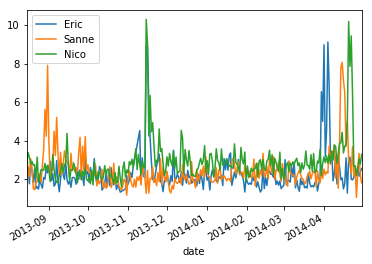

In [41]:
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()